In [ ]:
#Edgar Moises Hernandez-Gonzalez
#07/07/19
#Digitos con CNN, se utilizara el vector (no las imagenes)

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
num_classes = 10
n_samples = len(digits.target)
print(digits.data.shape)
print(digits.target.shape)
print(n_samples)

(1797, 64)
(1797,)
1797


In [3]:
#convertir de 2D a 4D
x = digits.data.reshape((n_samples, 8, 8, 1))
print(x.shape)

(1797, 8, 8, 1)


In [4]:
#escalar los datos para que esten en un rango de 0 a 1
x = x / 16.0

In [5]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, digits.target)

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 6, 32)          320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 64)          8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
__________

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 1024, validation_data=(x_test, y_test))

Train on 1347 samples, validate on 450 samples
Epoch 1/200
1347/1347 [==============================] - 4s 3ms/sample - loss: 2.3070 - acc: 0.1128 - val_loss: 2.2977 - val_acc: 0.0867
Epoch 2/200
1347/1347 [==============================] - 0s 24us/sample - loss: 2.2938 - acc: 0.1284 - val_loss: 2.2852 - val_acc: 0.0867
Epoch 3/200
1347/1347 [==============================] - 0s 26us/sample - loss: 2.2796 - acc: 0.1329 - val_loss: 2.2743 - val_acc: 0.0889
Epoch 4/200
1347/1347 [==============================] - 0s 28us/sample - loss: 2.2696 - acc: 0.1604 - val_loss: 2.2643 - val_acc: 0.1000
Epoch 5/200
1347/1347 [==============================] - 0s 27us/sample - loss: 2.2569 - acc: 0.1804 - val_loss: 2.2549 - val_acc: 0.1089
Epoch 6/200
1347/1347 [==============================] - 0s 27us/sample - loss: 2.2449 - acc: 0.1997 - val_loss: 2.2438 - val_acc: 0.1333
Epoch 7/200
1347/1347 [==============================] - 0s 28us/sample - loss: 2.2344 - acc: 0.2353 - val_loss: 2.2304 - val_

Epoch 118/200
1347/1347 [==============================] - 0s 25us/sample - loss: 0.0893 - acc: 0.9800 - val_loss: 0.1044 - val_acc: 0.9711
Epoch 119/200
1347/1347 [==============================] - 0s 26us/sample - loss: 0.0909 - acc: 0.9814 - val_loss: 0.1022 - val_acc: 0.9689
Epoch 120/200
1347/1347 [==============================] - 0s 26us/sample - loss: 0.0980 - acc: 0.9755 - val_loss: 0.1026 - val_acc: 0.9667
Epoch 121/200
1347/1347 [==============================] - 0s 29us/sample - loss: 0.0954 - acc: 0.9822 - val_loss: 0.1063 - val_acc: 0.9644
Epoch 122/200
1347/1347 [==============================] - 0s 29us/sample - loss: 0.0878 - acc: 0.9800 - val_loss: 0.1041 - val_acc: 0.9667
Epoch 123/200
1347/1347 [==============================] - 0s 29us/sample - loss: 0.0886 - acc: 0.9814 - val_loss: 0.1024 - val_acc: 0.9667
Epoch 124/200
1347/1347 [==============================] - 0s 27us/sample - loss: 0.0794 - acc: 0.9852 - val_loss: 0.1000 - val_acc: 0.9667
Epoch 125/200
1347/1

In [10]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

450/450 [==============================] - 0s 170us/sample - loss: 0.0668 - acc: 0.9733
Test loss: 0.06682697956139842
Test accuracy: 0.97333336


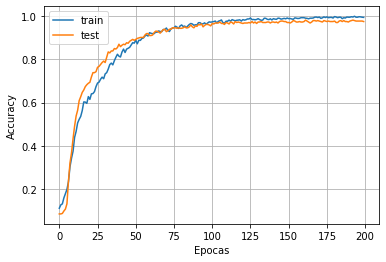

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

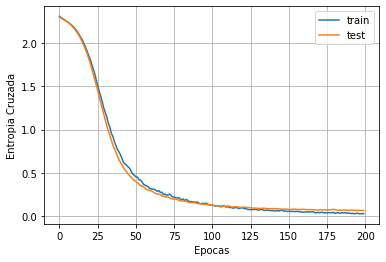

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()